## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_flights = pd.read_csv('Repo LHL_Midterm_1/flights_data.csv')
df_flights

F:\Anaconda\envs\lhl\lib\site-packages\IPython\core\interactiveshell.py:3170: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-01-01,DL,DL_CODESHARE,DL,3468,9E,N292PQ,3468,15380,TVC,...,207.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,DL,DL_CODESHARE,DL,3470,9E,N309PQ,3470,13871,OMA,...,651.0,47.0,0.0,11.0,0.0,0.0,NaN,NaN,NaN,NaN
2,2018-01-01,DL,DL_CODESHARE,DL,3471,9E,N337PQ,3471,13487,MSP,...,386.0,23.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,2018-01-01,DL,DL_CODESHARE,DL,3472,9E,N932XJ,3472,12339,IND,...,945.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,DL,DL_CODESHARE,DL,3472,9E,N932XJ,3472,14635,RSW,...,945.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321093,2019-01-08,UA,UA_CODESHARE,UA,4408,EV,N14907,4408,14685,SAV,...,708.0,13.0,0.0,74.0,0.0,0.0,NaN,NaN,NaN,NaN
321094,2019-01-08,UA,UA_CODESHARE,UA,4409,EV,N881AS,4409,13930,ORD,...,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
321095,2019-01-08,UA,UA_CODESHARE,UA,4410,EV,N13913,4410,13930,ORD,...,315.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
321096,2019-01-08,UA,UA_CODESHARE,UA,4411,EV,N14570,4411,12266,IAH,...,295.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_flights.dtypes

fl_date                 object
mkt_unique_carrier      object
branded_code_share      object
mkt_carrier             object
mkt_carrier_fl_num       int64
op_unique_carrier       object
tail_num                object
op_carrier_fl_num        int64
origin_airport_id        int64
origin                  object
origin_city_name        object
dest_airport_id          int64
dest                    object
dest_city_name          object
crs_dep_time             int64
dep_time               float64
dep_delay              float64
taxi_out               float64
wheels_off             float64
wheels_on              float64
taxi_in                float64
crs_arr_time             int64
arr_time               float64
arr_delay              float64
cancelled              float64
cancellation_code       object
diverted               float64
dup                     object
crs_elapsed_time       float64
actual_elapsed_time    float64
air_time               float64
flights                float64
distance

In [4]:
df_flights['arr_delay'].describe()

count    319087.000000
mean          6.209491
std          52.340263
min         -78.000000
25%         -15.000000
50%          -5.000000
75%          10.000000
max        1778.000000
Name: arr_delay, dtype: float64

In [5]:
df_flights.isnull().sum()

fl_date                     0
mkt_unique_carrier          0
branded_code_share          0
mkt_carrier                 0
mkt_carrier_fl_num          0
op_unique_carrier           0
tail_num                  135
op_carrier_fl_num           0
origin_airport_id           0
origin                      0
origin_city_name            0
dest_airport_id             0
dest                        0
dest_city_name              0
crs_dep_time                0
dep_time                 1278
dep_delay                1441
taxi_out                 1308
wheels_off               1308
wheels_on                1416
taxi_in                  1416
crs_arr_time                0
arr_time                 1416
arr_delay                2011
cancelled                   0
cancellation_code      319770
diverted                    0
dup                         0
crs_elapsed_time            0
actual_elapsed_time      1962
air_time                 1962
flights                     0
distance                    0
carrier_de

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [6]:
# Set null values in arr_delay equal to zero (no flight delay or earlier-than-expected arrival)
arr_delay_df = df_flights['arr_delay'].fillna(value=0)
arr_delay_df.isnull().sum()

0

In [7]:
# Get an idea of the flight delay binning.
pd.cut(arr_delay_df, bins=10).value_counts()

(-79.856, 107.6]    310968
(107.6, 293.2]        8753
(293.2, 478.8]         897
(478.8, 664.4]         182
(664.4, 850.0]         138
(850.0, 1035.6]         87
(1035.6, 1221.2]        33
(1221.2, 1406.8]        20
(1406.8, 1592.4]        15
(1592.4, 1778.0]         5
Name: arr_delay, dtype: int64

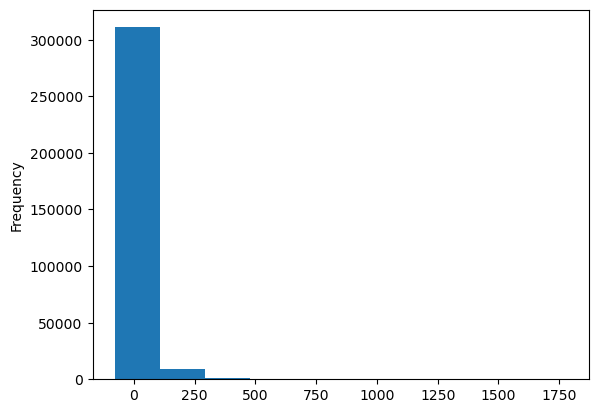

In [8]:
arr_delay_df.plot(kind='hist')
plt.show()

# Basic histogram of flight delays times vs. frequency

In [9]:
# Set dataframe range manually to deal with outliers, based on binning
arr_delay_df_filtered = arr_delay_df[arr_delay_df <= 107.6]

In [10]:
def evaluate_test(p,alpha):
    if p < alpha:
        return print("Since the p-value (", p, ") is less than the significance level alpha (", alpha, "), we REJECT the null hypothesis.")
    elif p == alpha:
        return print("Since the p-value (", p, ") is equal to the significance level alpha (", alpha, "), rejection/acceptance of the null hypothesis is INCONCLUSIVE.")
    else:
        return print("Since the p-value (", p, ") is greater than the significance level alpha (", alpha, "), we ACCEPT the null hypothesis.")

In [11]:
# Sample 5000 points to meet Scipy's Shapiro function requirements
arr_delay_df_5000 = np.random.choice(arr_delay_df_filtered, size=5000)

print(stats.shapiro(arr_delay_df_5000))

ShapiroResult(statistic=0.8776090145111084, pvalue=0.0)


In [12]:
evaluate_test(stats.shapiro(arr_delay_df_5000)[1], alpha=0.05)
print('i.e. the data indicates the delays are not from a Normal Distribution.')

Since the p-value ( 0.0 ) is less than the significance level alpha ( 0.05 ), we REJECT the null hypothesis.
i.e. the data indicates the delays are not from a Normal Distribution.


In [13]:
# Test hypothesis that the mean of the delay is 0.
stats.ttest_1samp(arr_delay_df_filtered, 0)

Ttest_1sampResult(statistic=-10.980086912872267, pvalue=4.821572176632269e-28)

In [14]:
evaluate_test(stats.ttest_1samp(arr_delay_df_filtered, 0)[1], alpha=0.05)
print('i.e. the data indicates the mean of the delays is not zero.')

Since the p-value ( 4.821572176632269e-28 ) is less than the significance level alpha ( 0.05 ), we REJECT the null hypothesis.
i.e. the data indicates the mean of the delays is not zero.


#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [15]:
df_flights_all_2019_months = pd.read_csv('Repo LHL_Midterm_1/flights_data_all_2019_Months.csv')
df_flights_all_2019_months

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-03-31,AS,AS,AS,52,AS,N527AS,52,10299,ANC,...,1448.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-07-08,B6,B6,B6,161,B6,N913JB,161,12478,JFK,...,2521.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-09-13,AA,AA_CODESHARE,AA,4879,PT,N639AE,4879,14100,PHL,...,279.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-09-17,DL,DL_CODESHARE,DL,3764,OO,N882AS,3764,11433,DTW,...,399.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-11-04,UA,UA_CODESHARE,UA,4748,AX,N21144,4748,10868,CAE,...,666.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,2019-08-27,B6,B6,B6,244,B6,N508JL,244,14027,PBI,...,1023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299996,2019-12-26,DL,DL_CODESHARE,DL,4784,9E,N835AY,4784,11433,DTW,...,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299997,2019-02-01,G4,G4,G4,1758,G4,330NV,1758,11697,FLL,...,781.0,126.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
299998,2019-08-01,UA,UA_CODESHARE,UA,5780,OO,N134SY,5780,13485,MSN,...,1772.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Set arr_del nulls equal to zero
df_flights_all_2019_months['arr_delay'].fillna(value=0, inplace=True)
df_flights_all_2019_months['arr_delay'].isnull().sum()

0

In [17]:
# Format fl_date column as a date
df_flights_all_2019_months['fl_date'] = pd.to_datetime(df_flights_all_2019_months['fl_date'])

In [18]:
# Create fl_month column
df_flights_all_2019_months['fl_month'] = pd.DatetimeIndex(df_flights_all_2019_months['fl_date']).month

In [19]:
# Filter data to remove big outliers based on histogram data above
df_flights_all_2019_months_filtered = df_flights_all_2019_months[df_flights_all_2019_months['arr_delay'] < 293.2]

In [20]:
delay_means = df_flights_all_2019_months_filtered.groupby('fl_month')['arr_delay'].mean().reset_index()
delay_medians = df_flights_all_2019_months_filtered.groupby('fl_month')['arr_delay'].median().reset_index()
delay_means

,fl_month,arr_delay
0,1,1.943979
1,2,6.605568
2,3,1.210007
3,4,2.188060
4,5,4.098114
5,6,9.240838
6,7,5.837078
7,8,4.973081
8,9,-1.042919
9,10,1.178641


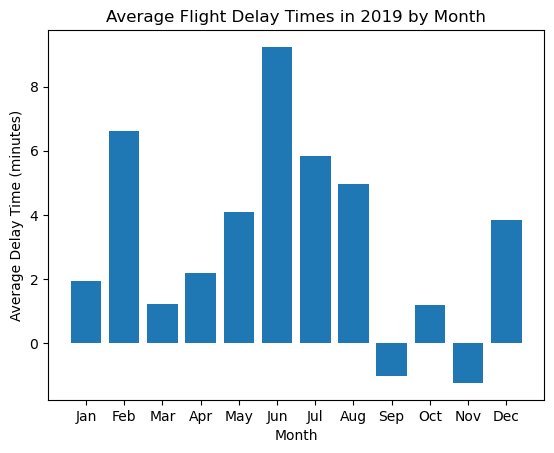

In [21]:
# Plot chart
data = delay_means['arr_delay']
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xlabel('Month')
plt.ylabel('Average Delay Time (minutes)')
plt.title('Average Flight Delay Times in 2019 by Month')
plt.bar(x=labels, height=data)
plt.show()

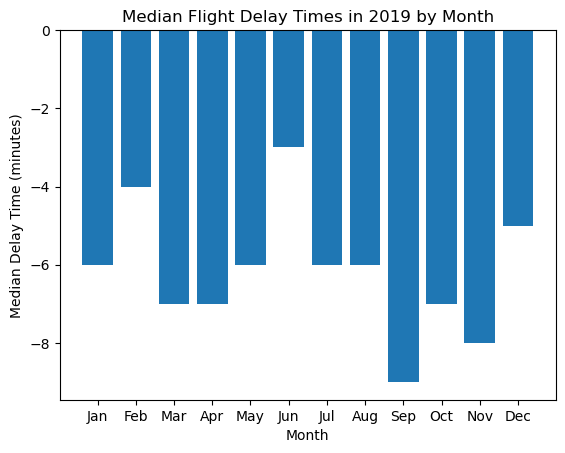

In [22]:
# Plot chart
data = delay_medians['arr_delay']
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xlabel('Month')
plt.ylabel('Median Delay Time (minutes)')
plt.title('Median Flight Delay Times in 2019 by Month')
plt.bar(x=labels, height=data)
plt.show()

In [23]:
# Check flight counts by month from unfiltered dataset
flight_counts = df_flights_all_2019_months.groupby('fl_month')['fl_date'].count().reset_index()

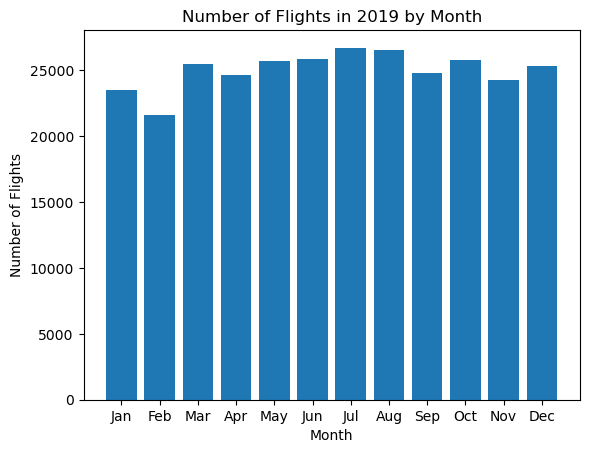

In [24]:
# Plot chart
data = flight_counts['fl_date']
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.title('Number of Flights in 2019 by Month')
plt.bar(x=labels, height=data)
plt.show()

**Explanation**

The delays seem higher in the February, June to August, and December. Possible reasons:

* Not all flights are fully booked with passengers. However, during these months, the number of passengers per flight could be higher (due to holidays and vacations).
* The proportion of non-business passengers flying during these months is probably higher than normal. Late-arriving aircraft could be more likely if the passengers feel less obligated to show up on time.
* Air traffic control issues due to slightly higher number of flights in summer and December.
* Possibly more extreme weather in these months (to be analyzed below).

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [28]:
import os
from IPython.display import JSON
import requests as re
import time

In [ ]:
pd.set_option('max_columns', None)
#pd.reset_option('max_columns')

In [143]:
df_flights['state'] = df_flights['origin_city_name'].str[-2:]

In [156]:
# Find all unique cities on a given day for an API query.

#df_flights[df_flights['fl_date'] < '2019-01-01'].groupby(by=['fl_date','state'],axis=0).size()
#df_flights[(df_flights['fl_date'] >= '2019-01-01') & (df_flights['fl_date'] <= '2019-01-01')].groupby(by=['fl_date','origin_city_name'],axis=0).size()
df_flights[df_flights['fl_date'] == '2019-01-01'].groupby(by=['fl_date','origin_city_name'],axis=0).size()

fl_date     origin_city_name
2019-01-01  Aberdeen, SD         2
            Abilene, TX          5
            Aguadilla, PR        8
            Akron, OH           19
            Albany, GA           2
                                ..
            Wilmington, NC      19
            Worcester, MA        4
            Wrangell, AK         2
            Yakima, WA           4
            Yuma, AZ             3
Length: 343, dtype: int64

In [166]:
df_flights_20190101 = df_flights[df_flights['fl_date'] == '2019-01-01']
df_flights_20190101['origin_city_name'].unique().tolist()

['Myrtle Beach, SC',
 'Hartford, CT',
 'Washington, DC',
 'Norfolk, VA',
 'Asheville, NC',
 'Charlotte, NC',
 'Milwaukee, WI',
 'St. Louis, MO',
 'Melbourne, FL',
 'Syracuse, NY',
 'Madison, WI',
 'Savannah, GA',
 'Raleigh/Durham, NC',
 'Manchester, NH',
 'Pittsburgh, PA',
 'Cincinnati, OH',
 'Philadelphia, PA',
 'Knoxville, TN',
 'Grand Rapids, MI',
 'Cleveland, OH',
 'Detroit, MI',
 'Huntsville, AL',
 'Watertown, NY',
 'Jackson/Vicksburg, MS',
 'Tallahassee, FL',
 'Charleston/Dunbar, WV',
 'Fayetteville, NC',
 'Des Moines, IA',
 'Birmingham, AL',
 'Little Rock, AR',
 'New Haven, CT',
 'Augusta, GA',
 'Cedar Rapids/Iowa City, IA',
 'Greer, SC',
 'Valparaiso, FL',
 'Dayton, OH',
 'Buffalo, NY',
 'Louisville, KY',
 'Greensboro/High Point, NC',
 'Columbia, SC',
 'Chicago, IL',
 'Burlington, VT',
 'Akron, OH',
 'Charleston, SC',
 'Jacksonville/Camp Lejeune, NC',
 'Oklahoma City, OK',
 'Fayetteville, AR',
 'Memphis, TN',
 'Allentown/Bethlehem/Easton, PA',
 'Mobile, AL',
 'White Plains, NY'

In [165]:
df_flights_20190101['fl_date'].iloc[0]

'2019-01-01'

In [171]:
# Set up API query function
api_key = os.environ["VisualCrossing_API_Code"]

def weather_query_oneday(flightsDF):
    '''
    Given a dataframe of flights info on a given day, return a list of weather conditions for each unique origin city.
    '''
    
    city_list = flightsDF['origin_city_name'].unique().tolist()
    city_list_cleaned = []
    
    # Replace forward slashes in city names
    for elem in city_list:
        if elem.find('/') == -1:
            city_list_cleaned.append(elem)
        else:
            city_list_cleaned.append(elem.replace('/','-'))
    
    date = flightsDF['fl_date'].iloc[0]
    
    weather_conditions_list = []
    weather_conditions_dict = {}

    for i in range(0,len(city_list_cleaned)):
        res = re.get(f'https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/{city_list_cleaned[i]}/{date}?unitGroup=us&key={api_key}&include=current')
        weather_conditions_list.append(res.json()['days'][0]['conditions'])
        weather_conditions_dict.update({city_list[i]:weather_conditions_list[i]})
    
    return weather_conditions_dict

In [172]:
df_flights_20190101_weather = weather_query_oneday(df_flights_20190101)

In [177]:
df_flights_20190101_weather.items()

dict_items([('Myrtle Beach, SC', 'Rain, Partially cloudy'), ('Hartford, CT', 'Rain, Partially cloudy'), ('Washington, DC', 'Rain, Partially cloudy'), ('Norfolk, VA', 'Partially cloudy'), ('Asheville, NC', 'Rain'), ('Charlotte, NC', 'Rain, Partially cloudy'), ('Milwaukee, WI', 'Snow, Overcast'), ('St. Louis, MO', 'Overcast'), ('Melbourne, FL', 'Partially cloudy'), ('Syracuse, NY', 'Rain, Partially cloudy'), ('Madison, WI', 'Snow, Partially cloudy'), ('Savannah, GA', 'Partially cloudy'), ('Raleigh/Durham, NC', 'Partially cloudy'), ('Manchester, NH', 'Snow, Partially cloudy'), ('Pittsburgh, PA', 'Rain, Overcast'), ('Cincinnati, OH', 'Rain, Overcast'), ('Philadelphia, PA', 'Rain, Partially cloudy'), ('Knoxville, TN', 'Rain, Partially cloudy'), ('Grand Rapids, MI', 'Snow, Overcast'), ('Cleveland, OH', 'Rain, Overcast'), ('Detroit, MI', 'Rain, Partially cloudy'), ('Huntsville, AL', 'Rain, Partially cloudy'), ('Watertown, NY', 'Rain, Partially cloudy'), ('Jackson/Vicksburg, MS', 'Partially cl

In [178]:
def weather_simplification_dict(weather_dict):
    '''
    Given a list of weather conditions in a dictionary with cities, simplify the types into Sunny, Cloudy, Rainy, or Snow.
    '''

    weather_simplified = weather_dict

    for key, value in df_flights_20190101_weather.items():
        
        if value.find('Snow') > -1:
            df_flights_20190101_weather.update({key:'Snow'})
            
        elif value.find('Rain') > -1:
            df_flights_20190101_weather.update({key:'Rainy'})
            
        elif (value.find('cloudy') > -1) or (value.find('Overcast') > -1):
            df_flights_20190101_weather.update({key:'Cloudy'})
            
        else:
            df_flights_20190101_weather.update({key:'Sunny'})
    
    return weather_simplified

In [179]:
df_flights_20190101_weather_simplified = weather_simplification_dict(df_flights_20190101_weather)
df_flights_20190101_weather_simplified

{'Myrtle Beach, SC': 'Rainy',
 'Hartford, CT': 'Rainy',
 'Washington, DC': 'Rainy',
 'Norfolk, VA': 'Cloudy',
 'Asheville, NC': 'Rainy',
 'Charlotte, NC': 'Rainy',
 'Milwaukee, WI': 'Snow',
 'St. Louis, MO': 'Cloudy',
 'Melbourne, FL': 'Cloudy',
 'Syracuse, NY': 'Rainy',
 'Madison, WI': 'Snow',
 'Savannah, GA': 'Cloudy',
 'Raleigh/Durham, NC': 'Cloudy',
 'Manchester, NH': 'Snow',
 'Pittsburgh, PA': 'Rainy',
 'Cincinnati, OH': 'Rainy',
 'Philadelphia, PA': 'Rainy',
 'Knoxville, TN': 'Rainy',
 'Grand Rapids, MI': 'Snow',
 'Cleveland, OH': 'Rainy',
 'Detroit, MI': 'Rainy',
 'Huntsville, AL': 'Rainy',
 'Watertown, NY': 'Rainy',
 'Jackson/Vicksburg, MS': 'Cloudy',
 'Tallahassee, FL': 'Cloudy',
 'Charleston/Dunbar, WV': 'Rainy',
 'Fayetteville, NC': 'Rainy',
 'Des Moines, IA': 'Cloudy',
 'Birmingham, AL': 'Rainy',
 'Little Rock, AR': 'Rainy',
 'New Haven, CT': 'Rainy',
 'Augusta, GA': 'Rainy',
 'Cedar Rapids/Iowa City, IA': 'Cloudy',
 'Greer, SC': 'Cloudy',
 'Valparaiso, FL': 'Rainy',
 'Dayt

In [202]:
# Apply weather results to dataframe

df_flights_20190101['origin_weather'] = df_flights_20190101.apply(lambda row: df_flights_20190101_weather_simplified[row['origin_city_name']], axis=1)

# Set arr_delay nulls to zero
df_flights_20190101['arr_delay'].fillna(value=0, inplace=True)

df_flights_20190101.groupby('origin_weather').size()

F:\Anaconda\envs\lhl\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
F:\Anaconda\envs\lhl\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


origin_weather
Cloudy    8189
Rainy     6592
Snow      1859
Sunny     3043
dtype: int64

In [204]:
# Create lists of delays for statistical analysis

sunny_delays_20190101 = df_flights_20190101[df_flights_20190101['origin_weather'] == 'Sunny']['arr_delay'].tolist()
cloudy_delays_20190101 = df_flights_20190101[df_flights_20190101['origin_weather'] == 'Cloudy']['arr_delay'].tolist()
rainy_delays_20190101 = df_flights_20190101[df_flights_20190101['origin_weather'] == 'Rainy']['arr_delay'].tolist()
snow_delays_20190101 = df_flights_20190101[df_flights_20190101['origin_weather'] == 'Snow']['arr_delay'].tolist()

In [205]:
stats.f_oneway(sunny_delays_20190101, cloudy_delays_20190101, rainy_delays_20190101, snow_delays_20190101)

F_onewayResult(statistic=199.96573100555258, pvalue=9.230996596172726e-128)

In [43]:
# Bin flights based on delay value, and randomly select from bins for analysis.
arr_delay_bins = pd.cut(arr_delay_df, bins=10)
arr_delay_bins.value_counts()

(-79.856, 107.6]    310968
(107.6, 293.2]        8753
(293.2, 478.8]         897
(478.8, 664.4]         182
(664.4, 850.0]         138
(850.0, 1035.6]         87
(1035.6, 1221.2]        33
(1221.2, 1406.8]        20
(1406.8, 1592.4]        15
(1592.4, 1778.0]         5
Name: arr_delay, dtype: int64

In [45]:
# Add bins to main dataframe
df_flights['bins'] = arr_delay_bins.astype(str)

In [46]:
# Select 50 samples from first few delay bins
df_flights_bin1 = df_flights[df_flights['bins'] == '(-79.856, 107.6]'].sample(n=50)
df_flights_bin2 = df_flights[df_flights['bins'] == '(107.6, 293.2]'].sample(n=50)
df_flights_bin3 = df_flights[df_flights['bins'] == '(293.2, 478.8]'].sample(n=50)
df_flights_bin4 = df_flights[df_flights['bins'] == '(478.8, 664.4]'].sample(n=50)
df_flights_bin5 = df_flights[df_flights['bins'] == '(664.4, 850.0]'].sample(n=50)
df_flights_bin6 = df_flights[df_flights['bins'] == '(850.0, 1035.6]'].sample(n=50)

In [93]:
# Set up API query function
api_key = os.environ["VisualCrossing_API_Code"]

def weather_query(flightsDF):
    '''
    Given a dataframe of flights info, return a list of weather conditions.
    '''
    
    city_list = flightsDF['origin_city_name'].tolist()
    city_list_cleaned = []
    
    # Replace forward slashes in city names
    for elem in city_list:
        if elem.find('/') == -1:
            city_list_cleaned.append(elem)
        else:
            city_list_cleaned.append(elem.replace('/','-'))
    
    date_list = flightsDF['fl_date'].tolist()
    
    weather_conditions_list = []

    for i in range(0,len(flightsDF)):
        res = re.get(f'https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/{city_list_cleaned[i]}/{date_list[i]}?unitGroup=us&key={api_key}&include=current')
        weather_conditions_list.append(res.json()['days'][0]['conditions'])
        #print(weather_conditions_list)
        
    return weather_conditions_list

In [60]:
city_listx = df_flights_bin1['origin_city_name'].tolist()
city_listx[3]
#df_flights_bin1['origin_city_name'].iloc[0]

'Denver, CO'

In [115]:
# # Uncomment only if desiring to run API queries

# weather_bin1 = weather_query(df_flights_bin1)
# weather_bin2 = weather_query(df_flights_bin2)
# weather_bin3 = weather_query(df_flights_bin3)
# weather_bin4 = weather_query(df_flights_bin4)
# weather_bin5 = weather_query(df_flights_bin5)
# weather_bin6 = weather_query(df_flights_bin6)

In [86]:
def weather_simplification(weather_list):
    '''
    Given a list of weather conditions, simplify the types into Sunny, Cloudy, Rainy, or Snow.
    '''

    weather_simplified = []

    for i in range(0,len(weather_list)):
        
        if weather_list[i].find('Snow') > -1:
            weather_simplified.append('Snow')
            
        elif weather_list[i].find('Rain') > -1:
            weather_simplified.append('Rainy')
            
        elif (weather_list[i].find('cloudy') > -1) or (weather_list[i].find('Overcast') > -1):
            weather_simplified.append('Cloudy')
            
        else:
            weather_simplified.append('Sunny')
    
    return weather_simplified

In [116]:
weather_bin1_simplified = weather_simplification(weather_bin1)
weather_bin2_simplified = weather_simplification(weather_bin2)
weather_bin3_simplified = weather_simplification(weather_bin3)
weather_bin4_simplified = weather_simplification(weather_bin4)
weather_bin5_simplified = weather_simplification(weather_bin5)
weather_bin6_simplified = weather_simplification(weather_bin6)

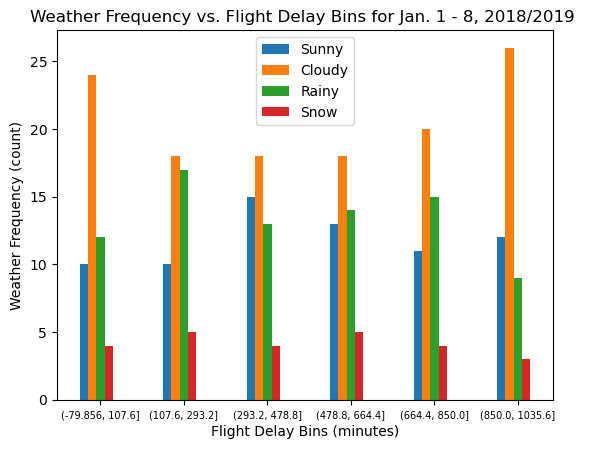

In [118]:
# Plot the weather in a multi-bar chart. Based on previous research, I do not expect to see a significant trend for weather affecting delay (compared to other delay factors).

X = ['(-79.856, 107.6]', '(107.6, 293.2]', '(293.2, 478.8]', '(478.8, 664.4]', '(664.4, 850.0]', '(850.0, 1035.6]']

Y_sunny = [weather_bin1_simplified.count('Sunny'), weather_bin2_simplified.count('Sunny'), weather_bin3_simplified.count('Sunny'), weather_bin4_simplified.count('Sunny'), weather_bin5_simplified.count('Sunny'), weather_bin6_simplified.count('Sunny')]
Y_cloudy = [weather_bin1_simplified.count('Cloudy'), weather_bin2_simplified.count('Cloudy'), weather_bin3_simplified.count('Cloudy'), weather_bin4_simplified.count('Cloudy'), weather_bin5_simplified.count('Cloudy'), weather_bin6_simplified.count('Cloudy')]
Y_rainy = [weather_bin1_simplified.count('Rainy'), weather_bin2_simplified.count('Rainy'), weather_bin3_simplified.count('Rainy'), weather_bin4_simplified.count('Rainy'), weather_bin5_simplified.count('Rainy'), weather_bin6_simplified.count('Rainy')]
Y_snow = [weather_bin1_simplified.count('Snow'), weather_bin2_simplified.count('Snow'), weather_bin3_simplified.count('Snow'), weather_bin4_simplified.count('Snow'), weather_bin5_simplified.count('Snow'), weather_bin6_simplified.count('Snow')]

X_axis = np.arange(len(X))

width=0.1

plt.bar(X_axis - width*2, Y_sunny, width=width, label = 'Sunny')
plt.bar(X_axis - width, Y_cloudy, width=width, label = 'Cloudy')
plt.bar(X_axis, Y_rainy, width=width, label = 'Rainy')
plt.bar(X_axis + width, Y_snow, width=width, label = 'Snow')

plt.xticks(X_axis, X)
plt.tick_params(axis = 'x', which = 'major', labelsize = 7)
plt.xlabel("Flight Delay Bins (minutes)")
plt.ylabel("Weather Frequency (count)")
plt.title("Weather Frequency vs. Flight Delay Bins for Jan. 1 - 8, 2018/2019 ")
plt.legend()
plt.show()

In [120]:
Y_sunny

[10, 10, 15, 13, 11, 12]

In [ ]:
stats.mannwhitneyu(Y

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

#### **Task 6**: How many states cover 50% of US air traffic? 

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?